# Chapter 1: Rule-Based AI in Last Coin Standing

This chapter introduces you to the game of last coin standing (a.k.a., the coin game). We'll create an artificial intelligence (AI) strategy that's rule-based. It plays perfectly once the rules are enforced: the second player always wins.

The purpose of this chapter is threefold. First, it creates a game environment for the coin game and provides a perfect solution to the game based on rule-based AI. Second, later in this book, we'll develop strategies for the coin game based on other algorithms such as MiniMax, Monte Carlo Tree Search, deep learning, deep reinforcement learning. We'll use rule-based AI developed in this chapter to test the effectiveness of game strategies in later chapters. Third, later in this book, when we train deep learning or deep reinforcement learning game strategies (such as the actor-critic method), we need to simulate games. The stronger the players in simulated games, the better the trained game strategies. We'll use rule-based AI developed in this chapter to siumlate games and train deep learnong models or deep reinforcement models. 

Nonetheless, the main takeaway from this chapter is that rule-based AI can be very effective in many situations. In fact, rule-based AI (including look-ahead search that we'll discuss later in this book) led to the victory of Deep Blue against the world Chess champion Gary Kasparov in 1997. 

Before you get started, create a folder /Desktop/ai/ on your computer's desktop. Each chapter is contained in a separate Jupyter Notebook named ch01.ipynb, ch02.ipynb and so on. The local modules and are stored in the subfolder /Desktop/ai/utils/. 

In [1]:
import os

os.makedirs("utils", exist_ok=True)
os.makedirs("files/ch01/", exist_ok=True)

Place an empty file __init__.py inside the folder /Desktop/ai/utils/ so that Python treats it as a local package. Further, download the file cash.png from the book's GitHub repository and place it in the folder /Desktop/ai/files/ch01/ on your computer. 

# 1. The Coin Game
This section discusses the game rules and the solution to the coin game. 
## 1.1. Game Rules
In the last coin standing game, there are 21 coins in a pile. Two players take turns to remove coins from the pile. Each player can take either one or two coins from the pile in each turn. Players are not allowed to skip a turn or take more than two coins at a time. The player who takes the last coin in the pile wins the game.

There are different versions of the game. In some versions, the player who takes the last coin loses. In other versions, a player can take either one, two, or three coins in each turn. No matter which version we use, the central message of this chapter remains the same: rule-based AI can work very effectively.

## 1.2. Implement Game Rules
We’ll write a simple Python program to implement the game rules. Open a new cell in the Jupyter notebook and enter the following code in it. Here you are playing again a computer player who makes random moves. Use your keyboard to enter numbers 1 or 2 to play a game.

In [2]:
from random import choice

coins = 21
while True:
    # Player 1 moves first, randomly
    move1 = choice([1,2])
    coins=coins-move1
    print(f'player 1 chooses {move1}; {coins} remaining')
    # Check if the game has ended
    if coins<=0:
        print('game over; player 1 won')
        break 
    # Player 2 moves after that
    while True:
        try:
            move2 = int(input('what\'s your choice?\n'))
            if int(move2)==1 or int(move2)==2:
                break
        except:
            print("please enter a number in the form of 1 or 2")   
    coins = coins - int(move2)
    print(f"you have chosen {move2};  {coins} remaining")
    # Check if the game has ended
    if coins<=0:
        print('game over; player 2 won')
        break    

player 1 chooses 1; 20 remaining
what's your choice?
2
you have chosen 2;  18 remaining
player 1 chooses 1; 17 remaining
what's your choice?
2
you have chosen 2;  15 remaining
player 1 chooses 2; 13 remaining
what's your choice?
2
you have chosen 2;  11 remaining
player 1 chooses 2; 9 remaining
what's your choice?
2
you have chosen 2;  7 remaining
player 1 chooses 2; 5 remaining
what's your choice?
2
you have chosen 2;  3 remaining
player 1 chooses 1; 2 remaining
what's your choice?
2
you have chosen 2;  0 remaining
game over; player 2 won


The computer makes the first move and randomly selects a valid move: 1 or 2. When it’s your turn, you can enter either 1 or 2 as your move. If you enter anything other than 1 or 2, the program will remind you to enter a valid move and let you re-try. After either the computer or you make a move, the program checks if the game is over. If not, it goes to the next player. 

I entered the number 2 every move to speed up the game. The results show that I have won. 

Run the above cell and play against the computer and see if you can figure out a winning strategy. Note that the computer player's moves are different each time you play because the moves are random.

## 1.3. A Winning Strategy

You may have figured out a winning strategy. The second player will always win if he/she follows this rule: make sure that the number of coins in the pile is a multiple of three. The pile starts with 21 coins, so it's already a multiple of three. Therefore, if the player 1 takes 1, player 2 should take 2; if the player 1 takes 2, player 2 should take 1. With this rule, player 2 will leave 18, 15, 12, 9, 6, and eventually 3 coins in the pile. Once there are three coins in the pile when it's player 1's turn to play, player 2 will win for sure. 

Play the game again using the above winning strategy.  

Next, we'll create a game environment for the Last Coin Standing game. We'll also add a graphical game board using the Python turtles library.

# 2. Create A Coin Game Environment 

We'll create a Last Coin Standing game environment, using the *turtle* library to draw game boards. We’ll create all the attributes and methods that a typical OpenAI Gym environment has. We do this so that later in the book, it's easy for us to train deep reinforcement learning game strategies for the game.  

## 2.1. A Python Class to Represent the Coin Game
We’ll create a Python class to represent the coin game environment. The class will have various attributes and methods to replicate those in a typical OpenAI Gym game environment. 

Specifically, our self-made coin game environment has the following attributes:
*	agents: there are two agents in the coin game environment, players 1 and 2.
*   action_space: an attribute that provides the space of all actions that can be taken by an agent. The action space will have two values, 1 and 2.
*	observation_space: an attribute that provides the list of all possible states in the environment. We'll use an integer number between 0 and 21 to represent the number of coins left in the pile. 
*	state: an attribute indicating which state an agent is currently in. The state is the number of coins left in the pile, which can take an integer number between 0 and 21.
*	action: an attribute indicating the action taken by an agent. The action is eihter 1 or 2.
*	reward: an attribute indicating the reward to the agents because of the actions taken by them. The reward is 0 in each step, unless a player has won the game. The reward is 1 to the winner and -1 to the loser. Note that there is no tie game. 
*	done: an attribute indicating whether the game has ended. This happens when one player wins and there is no coin left in the pile.
*	info: an attribute that provides information about the game. We'll set it as an empty string "". 

our self-made Coin game environment will have a few methods as well:
*	reset() is a method to set the game environment to the initial (that is, the starting) state. Player 1 has the turn and there are 21 coins in the pile.
*	render() is a method showing the current state of the environment graphically.
*	step() is a method that returns the new state, the reward, the value of the *done* variable, and the varibale *info* based on the action taken by an agent.
*	sample() is a method to randomly choose an action from the action space.
*	close() is a method to end the game environment, including stopping displaying the graph of the current state of the game board.

## 2.2. Create A Local Module for the Coin Game
We'll create a local module for the Coin game and place it inside the local package for this book: the package *utils* that we have created earlier in this chapter. Make sure you have an emplty file named $__init__.py$ inside the /utils folder so that Python can recognize it as a local package. 

Now let's code in a self-made coin game environment using a Python class. Save the code in the cell below as *coin_env.py* in the folder *utils* you created for this book. Alternatively, you can download it from the book's GitHub repository. 

In [3]:
import turtle as t
from random import choice
from tkinter import messagebox
from tkinter import PhotoImage
import time
import numpy as np

# Define an action_space helper class
class action_space:
    def __init__(self, n):
        self.n = n
    def sample(self):
        num = np.random.choice(range(self.n))
        # covert to 1 to 9 in string format 
        action = str(1+num)
        return action
    
# Define an obervation_space helper class    
class observation_space:
    def __init__(self, n):
        self.shape = (n,)

class coin_game():
    def __init__(self): 
        # use the helper action_space class
        self.action_space=action_space(2)
        # use the helper observation_space class
        self.observation_space=observation_space(1)
        self.info=""  
        self.showboard=False   
        # set the game to the initial state
        self.reset()
    def reset(self):  
        # The player 1 moves first
        self.turn = 1
        # Count how many coins left
        self.state = 21
        # Create a list of valid moves
        self.validinputs = [1, 2] if self.state>2 else [1]
        # Whether the game is over
        self.done=False
        self.reward=0
        self.move=0
        return self.state               
    # step() function: make a move and update state
    def step(self, inp):
        # choice of the move must be 1 or 2
        assert int(inp)==1 or int(inp)==2
        if self.state==1:
            self.move=1
        else:
            self.move=int(inp)
        # update the state
        self.state -= self.move
        # check if the player has won the game
        if self.state == 0:
            self.done=True
            # reward is 1 if player 1 won; -1 otherwise
            self.reward=2*(self.turn==1)-1
        # Give the turn to the other player
        if self.turn == 1:
            self.turn = 2
        else:
            self.turn = 1             
        return self.state, self.reward, self.done, self.info
    def display_board(self):
        # Set up the screen
        try:
            t.setup(600,500,10,70) 
        except t.Terminator:
            t.setup(600,500,10,70)   
        t.tracer(False)
        t.hideturtle()
        t.bgcolor("lavender")
        t.title("Last Coin Standing")
        # Create a second turtle to show coins left
        self.left = t.Turtle()
        self.left.up()
        self.left.hideturtle()
        self.left.goto(-120,-200)
        self.left.write(f"Coins left:   {self.state}", 
                        font = ('Arial',30,'normal'))
        self.left.up()
        self.left.goto(-200,150)
        self.left.write(f"Player {self.turn}'s turn to move",
                        font = ('Arial',30,'normal'))
        # Load a picture of the coin
        coin = PhotoImage(file = "cash.png").subsample(10,10)
        t.addshape("coin", t.Shape("image", coin))
        # Create 21 coin on screen 
        self.coins = [0]*21
        for i in range(21):
            self.coins[i] = t.Turtle('coin')
            self.coins[i].up()
            self.coins[i].goto(-150+50*(i//3),50-50*(i%3))
        t.update()
    def render(self):
        if self.showboard==False:
            self.display_board()
            self.showboard=True   
        # Update the number of coins left
        self.left.clear()
        self.left.goto(-120,-200)
        self.left.write(f"Coins left:   {self.state}", 
                        font = ('Arial',30,'normal'))
        self.left.goto(-200,150)
        self.left.write(f"Player {self.turn}'s turn to move",
                        font = ('Arial',30,'normal'))
        # Remove coins       
        if self.move==1:
            self.coins[self.state].hideturtle()              
        if self.move==2:
            self.coins[self.state+1].hideturtle()
            self.coins[self.state].hideturtle()                    
        t.update()                    
    def close(self):
        time.sleep(1)
        try:
            t.bye()
        except t.Terminator:
            print('exit turtle')

If you run the above cell, nothing will happen. The class simply creates a game environment. We need to initiate the game environment and start playing using Python programs, just as you do with an OpenAI Gym game environment. We'll do that in the next subsections.

## 2.3. Verify the Custom-Made Game Environment
Next, we'll check the attributes and methods of the self-made game environment and make sure it has all the elements that are provided by a typical OpenAI Gym game environment. 

First we'll initiate the game environment and show the game board.

In [4]:
from utils.coin_env import coin_game

env = coin_game()
env.reset()                    
env.render()

You should see a separate turtle game window, with a game board as follows: 
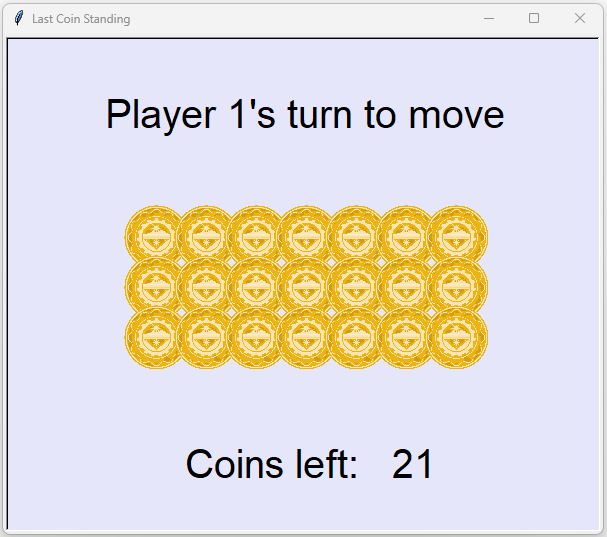

If you want to close the game board window, use the *close()* method, like so:

In [5]:
env.close()

exit turtle


Next, we'll check the attributes of the game environment such as the observation space and action space. 

In [6]:
env=coin_game()
# check the action space
number_actions=env.action_space.n
print("the number of possible actions are",number_actions)
# sample the action space ten times
print("the following are ten sample actions")
for i in range(10):
   print(env.action_space.sample())
# check the shape of the observation space
print("the shape of the observation space is",\
      env.observation_space.shape)

the number of possible actions are 2
the following are ten sample actions
1
1
1
2
1
1
2
2
2
2
the shape of the observation space is (1,)


Results above show that there are two possible actions that can be taken by the agent. The meanings of the actions in this game are as follows
• 1: Removing one coin from the pile
• 2: Removing two coins from the pile
The sample() method returns an action from the action space randomly. The state
space is a scalar: a number indicating how many coins left in the pile. 

# 3. Play Games in the Coin Game Environment
Next, we'll play games in the custom-made environment. Let’s first play a game by randomly choosing an action from the action space each step for both players. After that, you'll play a game manually against a computer player who makes random moves.

## 3.1. Play A Complete Game

Here we'll play a complete game, by randomly choosing an action from the action space each step.

In [7]:
import time
import random

env = coin_game()
env.reset()   
env.render()
print(f"the current state is state={env.state}") 
while True:   
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player {env.turn} has chosen {action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is state={env.state}") 
    if done:
        if reward==1:
            print("Player 1 has won!") 
        else:
            print("Player 2 has won!") 
        break
env.close()      

the current state is state=21
Player 1 has chosen 2
the current state is state=19
Player 2 has chosen 2
the current state is state=17
Player 1 has chosen 2
the current state is state=15
Player 2 has chosen 1
the current state is state=14
Player 1 has chosen 1
the current state is state=13
Player 2 has chosen 1
the current state is state=12
Player 1 has chosen 1
the current state is state=11
Player 2 has chosen 1
the current state is state=10
Player 1 has chosen 1
the current state is state=9
Player 2 has chosen 1
the current state is state=8
Player 1 has chosen 1
the current state is state=7
Player 2 has chosen 1
the current state is state=6
Player 1 has chosen 1
the current state is state=5
Player 2 has chosen 1
the current state is state=4
Player 1 has chosen 1
the current state is state=3
Player 2 has chosen 2
the current state is state=1
Player 1 has chosen 2
the current state is state=0
Player 1 has won!


The output above shows that player 1 has won. Run the above code cell several times yourself. You'll noitice that the output is different each time you run it because the moves are random.

## 3.2. Play the Coin Game Manually
Next, you’ll learn how to manually interact with the coin game environment. You'll use the keyboard to enter either 1 or 2. We'll make the game similar to the one we create at the beginning of this chapter when we didn't use the game environment. 

The following lines of code show you how.

In [8]:
# Initiate the game environment
env=coin_game()
env.reset()   
env.render()
print(f"the current state is state={env.state}")
# Play a full game manually
while True:
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player {env.turn} has chosen {action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is state={env.state}")
    if done:      
        print("Player 1 has won!") 
        break
    # Player 2 moves after that
    while True:
        try:
            move2 = int(input('what\'s your choice?\n'))
            if int(move2)==1 or int(move2)==2:
                break
        except:
            print("please enter a number in the form of 1 or 2")
    action = move2
    print(f"Player {env.turn} has chosen {action}")    
    state, reward, done, info = env.step(action)
    env.render()
    print(f"the current state is state={env.state}")
    if done:
        print("Player 2 has won!") 
        break   
env.close()        

the current state is state=21
Player 1 has chosen 2
what's your choice?
1
Player 2 has chosen 1
the current state is state=18
Player 1 has chosen 1
what's your choice?
2
Player 2 has chosen 2
the current state is state=15
Player 1 has chosen 2
what's your choice?
1
Player 2 has chosen 1
the current state is state=12
Player 1 has chosen 1
what's your choice?
2
Player 2 has chosen 2
the current state is state=9
Player 1 has chosen 2
what's your choice?
1
Player 2 has chosen 1
the current state is state=6
Player 1 has chosen 1
what's your choice?
2
Player 2 has chosen 2
the current state is state=3
Player 1 has chosen 2
what's your choice?
1
Player 2 has chosen 1
the current state is state=0
Player 2 has won!


Here I am playing second, and I used the winning strategy: if player chooses 1, I choose 2; if player chooses 2, I choose 1. As a result, I have won the game.

# 4. Build A Rule-Based AI for the Coin Game
In this section, you’ll learn to create a rule-based AI with the winning strategy. After that, you'll use the strategy to play games and test its effectiveness. 

Later in this book, you'll design various types of game strategies such as MiniMax, Monte Carlo Tree Search, Deep Q-Learning and so on. We'll often test the efficacy of these strategies. Therefore, in this chapter, you'll get used to writing programs to test AI game strategies. You'll also use different players to play against each other such as random players versus AI, AI versus AI, and so on.

## 4.1. An AI Player in the Coin Game
Below you'll create an AI game strategy based on the game state:

In [9]:
def rule_based_AI(state):
    if state%3 != 0:
        move = state%3
    else:
        move = random.choice([1,2])
    return move

The AI player will choose a move based on the game state (that is, how many coins left in the pile). If the game state is a multiple of 3, the AI player randomly chooses 1 or 2. Otherwise, the AI player chooses the reminder of the state divided by 3: doing this ensures that the number of coins left in the pile is a multiple of three. 

We'll also create a random player who randomly picks a number from 1 and 2.

In [10]:
def random_player(state):
    move = random.choice([1,2])
    return move

Even though we use the state as an input, the move made by the random player is independent of the state. It returns 1 or 2 randomly. 

## 4.2. Simulate One Coin Game
We'll create a function that simulates one game. We can choose the two players as the two arguments of the function, like so:

In [11]:
# Define the one_game() function
def one_game(player1, player2):
    env = coin_game()
    env.reset()     
    while True:    
        action = player1(env.state)  
        new_state, reward, done, info = env.step(action)
        if done:
            break
        action = player2(env.state)  
        new_state, reward, done, info = env.step(action)
        if done:
            break            
    return reward      

Note here we don't use the render() method in the one_game() to speed up game simulation. As a result, you won't see the game board. 

The one_game() function simulates one full game. That is, the simulation stops only when a player wins. The function returns the reward of the game. We can infer the outcome from the reward: if the reward is 1, player 1 has won; if the reward is -1, player 2 has won. 

# 5. Test the Efficacy of the AI Player
Next, we’ll test how often the AI palyer wins when the it plays against a random player. We also look at the game outcomes when two AI players play against each other.

## 5.1. Rule-Based AI Against A Random Player
First, we simulate 1000 games when the AI player moves first and plays against a random player. 

In [12]:
# Simulate 1000 games and record all outcomes
results=[]        
for x in range(1000):
    result=one_game(rule_based_AI, random_player)
    results.append(result)    
# Print out the number of games that AI won
wins=results.count(1)
print(f"The AI player has won {wins} games")
# Print out the number of games that AI lost
losses=results.count(-1)
print(f"The AI player has lost {losses} games")                 

The AI player has won 993 games
The AI player has lost 7 games


The AI palyer has won 993 games out of 1000. It lost the rest 7 games. Considering that if both players plays perfectly, the first player loses 100% of the time, the AI player has done a great job, winning more than 99% of the time when playing first. 

Note that when you run the above cell, you are likely to get a different outcome, but you should see the AI player wins about 99% of the time. 

Next, we test how often the AI player wins if it plays second.

We simulate 1000 games when the AI player moves second and plays against a random player. Specifically, when calling the one_game() function, we put random_player as the first argument and rule_based_AI as the second argument.

In [13]:
# Simulate 1000 games and record all outcomes
results=[]        
for x in range(1000):
    # important: put AI player second here
    result=one_game(random_player, rule_based_AI)
    results.append(result)    
# Print out the number of games that AI won
wins=results.count(-1)
print(f"The AI player has won {wins} games")
# Print out the number of games that AI lost
losses=results.count(1)
print(f"The AI player has lost {losses} games")                 

The AI player has won 0 games
The AI player has lost 1000 games


Since the AI player now plays second, a game outcome is -1 means that the AI player wins. The above results show that the AI palyer has won all 1000 games. Run the above cell youself multiple times. You will get the same outcome each time because the AI player has a perfect winning strategy. 

Next, we test what is the outcome if two AI players play against each other.

## 5.2. Both Players Use Rule-Based AI
In this subsection, we simulate 1000 games when both players use the rule-based AI game strategy we developed above. 

Specifically, when calling the one_game() function, we put rule_based_AI as both the first and the second argument.

In [14]:
# Simulate 1000 games and record all outcomes
results=[]        
for x in range(1000):
    # important: put AI player second here
    result=one_game(rule_based_AI, rule_based_AI)
    results.append(result)    
# Print out the number of games that first player won
wins1=results.count(1)
print(f"The first AI player has won {wins1} games")
# Print out the number of games that second AI won
wins2=results.count(-1)
print(f"The second AI player has won {wins2} games")                 

The first AI player has won 0 games
The second AI player has won 1000 games


The above results show that the second AI palyer has won all 1000 games. Run the above cell youself, you will get the same outcome, because the when both players play perfectly, the second player always wins.